<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install visualkeras

     |████████████████████████████████| 798kB 8.4MB/s 


In [2]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import random
import visualkeras

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from matplotlib import figure, pyplot
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
datapath = os.path.join("datasets", "zipped", "")
os.makedirs(datapath, exist_ok=True)

# Dataset is already split into test and train data
file_path = "https://raw.githubusercontent.com/robd123/AML/master/Project7/facesDB.zip"

urllib.request.urlretrieve(file_path, datapath + "facesDB.zip")

('datasets/zipped/facesDB.zip', <http.client.HTTPMessage at 0x7f233cb93b90>)

In [4]:
!unzip datasets/zipped/facesDB.zip

Archive:  datasets/zipped/facesDB.zip
   creating: facesDB/S1/
  inflating: facesDB/S1/1.BMP        
  inflating: facesDB/S1/10.BMP       
  inflating: facesDB/S1/2.BMP        
  inflating: facesDB/S1/3.BMP        
  inflating: facesDB/S1/4.BMP        
  inflating: facesDB/S1/5.BMP        
  inflating: facesDB/S1/6.BMP        
  inflating: facesDB/S1/7.BMP        
  inflating: facesDB/S1/8.BMP        
  inflating: facesDB/S1/9.BMP        
  inflating: facesDB/S1/Thumbs.db    
   creating: facesDB/S10/
  inflating: facesDB/S10/1.BMP       
  inflating: facesDB/S10/10.BMP      
  inflating: facesDB/S10/2.BMP       
  inflating: facesDB/S10/3.BMP       
  inflating: facesDB/S10/4.BMP       
  inflating: facesDB/S10/5.BMP       
  inflating: facesDB/S10/6.BMP       
  inflating: facesDB/S10/7.BMP       
  inflating: facesDB/S10/8.BMP       
  inflating: facesDB/S10/9.BMP       
  inflating: facesDB/S10/Thumbs.db   
   creating: facesDB/S11/
  inflating: facesDB/S11/1.BMP       
  inflating

**Import Images and Split Train and Test Data**

---
Because of the relatively high number of target classes compared to images, 40 classes and 400 images, a direct train/test split is not feasible as it may leave certain target classes out of the test set entirely.  For this dataset, 2 images will be selected randomly from each target class and added to the test set with the rest added to the training set.


In [5]:
train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
for i in range(1, 41):
  rands = random.sample(range(1, 11), 2) # Get 2 random numbers, these will be the indices of the images to be used in the test set
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in rands:
      test_images.append(img)
      test_labels.append(i - 1)
    else:
      train_images.append(img)
      train_labels.append(i - 1)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(320, 48, 48, 3)
(320,)
(80, 48, 48, 3)
(80,)


**Display Some of the Training Images**

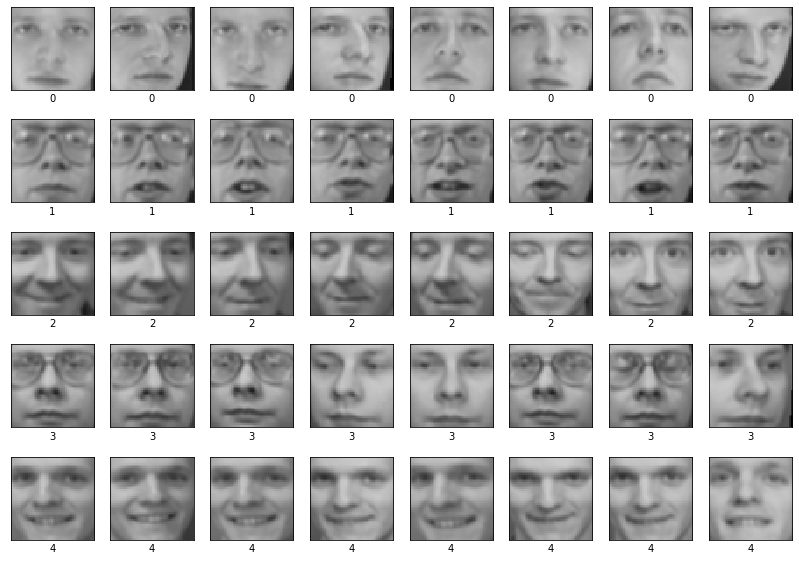

In [6]:
plt.figure( figsize=(14, 10), num='Some Images' )
plt.title( 'First 5 Targets' )
for i in range( 40 ):
    plt.subplot( 5, 8, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(train_labels[i])
plt.show()

**Normalize Data**

In [7]:
x_train = train_images.astype( 'float32' )/255
x_test = test_images.astype( 'float32' )/255
print(x_train[0].shape)

(48, 48, 3)


In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train.shape)
print(y_test.shape)

(320, 40)
(80, 40)


In [9]:
 def create_model_1():
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(40, activation="softmax")
    ])
  opt = SGD(momentum=0.5)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [10]:
model = create_model_1()

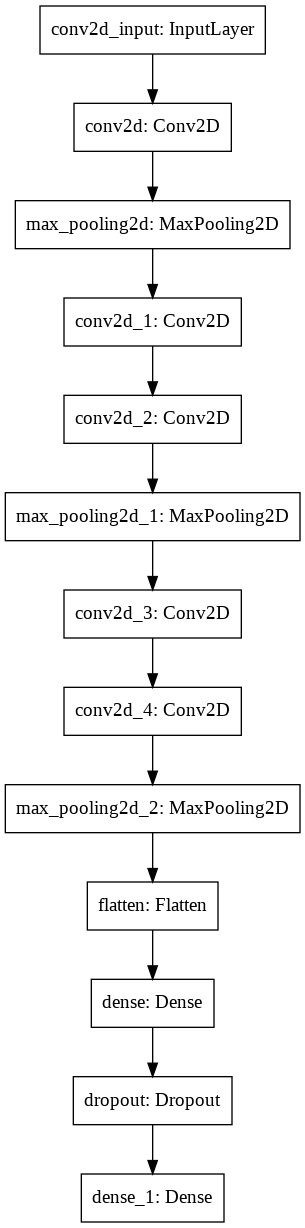

In [ ]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )

In [11]:
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/50
40/40 [==============================] - 17s 17ms/step - loss: 3.6925 - accuracy: 0.0159 - val_loss: 3.6873 - val_accuracy: 0.0250
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6888 - accuracy: 0.0030 - val_loss: 3.6864 - val_accuracy: 0.0250
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6877 - accuracy: 0.0283 - val_loss: 3.6857 - val_accuracy: 0.0375
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6873 - accuracy: 0.0220 - val_loss: 3.6848 - val_accuracy: 0.0250
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6838 - accuracy: 0.0273 - val_loss: 3.6838 - val_accuracy: 0.0250
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6853 - accuracy: 0.0463 - val_loss: 3.6825 - val_accuracy: 0.0375
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 3.6836 - accuracy: 0.0332 - val_loss: 3.6800 - val_accuracy: 0.0375
Epoch 8/50
40/40 [

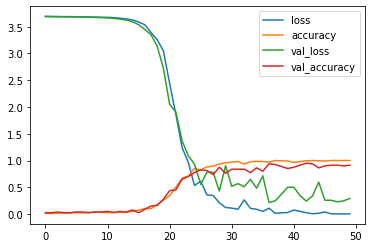

In [12]:
pd.DataFrame(model.history.history).plot()

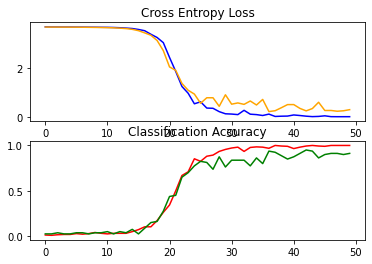

In [13]:
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(model.history.history['loss'], color='blue', label='train')
pyplot.plot(model.history.history['val_loss'], color='orange', label='test')	

pyplot.subplot(2, 1, 2)
pyplot.title('Classification Accuracy')
pyplot.plot(model.history.history['accuracy'], color='red', label='train')
pyplot.plot(model.history.history['val_accuracy'], color='green', label='test')
pyplot.show()

In [14]:
def evaluate_model(model, dataX, dataY, n_folds, batch_size, epochs, verbose):

  scores, histories = list(), list()
 
	# prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
 
	# enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
  
		# select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

		# fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data= (testX, testY) , verbose = verbose)
  
		# evaluate model
    _, acc = model.evaluate(testX, testY)
    print('CV Fold accuracy:  %.3f' % (acc * 100.0))
  
		# stores scores
    scores.append(acc)
    histories.append(history)
  
  return scores, histories

In [15]:
def summarize_learning(histories):

  for i in range(len(histories)):
		
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    pyplot.show()

In [16]:
def summarize_performance(scores):

	# print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

In [17]:
def predict_and_map(model, x_test, test_labels):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis = 1)
  cm = confusion_matrix(test_labels, pred_labels)
  plt.figure(figsize=(20,10))
  heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=np.arange(0,40), vmax=2, vmin=0, linewidths=.3, linecolor='black')
  heatmap.set(xlabel="Predicted", ylabel = "Actual")
  accuracy = accuracy_score(test_labels, pred_labels)
  print("Accuracy on Test Data: " + str(accuracy))
  return accuracy

In [18]:
def predict(model, x_test, test_labels):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis = 1)
  accuracy = accuracy_score(test_labels, pred_labels)
  return accuracy

In [19]:
# The main driver for evaluating the model
def process(model, num_folds, batch_size, epochs, verbose, plot_results):
	# evaluate the model using CV
  scores, histories = evaluate_model(model, x_train, y_train, num_folds, batch_size, epochs, verbose)
 
  if plot_results:
	# learning curves
    summarize_learning(histories)
  
    # summarize estimated performance
    summarize_performance(scores)
    accuracy = predict_and_map(model, x_test, test_labels)
  else:
    accuracy = predict(model, x_test, test_labels)
  return accuracy

In [20]:
 def create_model(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [21]:
 def create_model_4_conv_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
 def create_model_4_dense_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [24]:
accuracy_scores = list()
names = list()

In [25]:
model = create_model(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Baseline')
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.7662 - accuracy: 0.0250
CV Fold accuracy:  2.500
3/3 [==============================] - 0s 6ms/step - loss: 1.7128 - accuracy: 0.5250
CV Fold accuracy:  52.500
3/3 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.8750
CV Fold accuracy:  87.500
3/3 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.9125


In [26]:
# Reduced Batch Size to 8
model = create_model(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Reduced Batch Size')
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.5272 - accuracy: 0.1250
CV Fold accuracy:  12.500
3/3 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.8375
CV Fold accuracy:  83.750
3/3 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 1.0000
CV Fold accuracy:  100.000
3/3 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 0.9875
CV Fold accuracy:  98.750
0.8875


In [27]:
# Increased Number of Convolution Layers
model = create_model_4_conv_layers(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Increased Convolution Layers')
print(accuracy)

3/3 [==============================] - 0s 30ms/step - loss: 3.8327 - accuracy: 0.0000e+00
CV Fold accuracy:  0.000
3/3 [==============================] - 0s 6ms/step - loss: 1.1096 - accuracy: 0.7625
CV Fold accuracy:  76.250
3/3 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.9500
CV Fold accuracy:  95.000
3/3 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.8875


In [28]:
model = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Increased Dense Layers')
print(accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 3.7722 - accuracy: 0.0000e+00
CV Fold accuracy:  0.000
3/3 [==============================] - 0s 6ms/step - loss: 1.1111 - accuracy: 0.6750
CV Fold accuracy:  67.500
3/3 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.9125
CV Fold accuracy:  91.250
3/3 [==============================] - 0s 5ms/step - loss: 7.6094e-04 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.925


In [30]:
# Change SGD Momentum
model = create_model(SGD(momentum=0.8), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Increased Optimizer Momentum')
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 2.9699 - accuracy: 0.2000
CV Fold accuracy:  20.000
3/3 [==============================] - 0s 6ms/step - loss: 0.6986 - accuracy: 0.8375
CV Fold accuracy:  83.750
3/3 [==============================] - 0s 5ms/step - loss: 0.1029 - accuracy: 0.9875
CV Fold accuracy:  98.750
3/3 [==============================] - 0s 6ms/step - loss: 9.2739e-04 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.8625


In [31]:
# Increase Batch Size
model = create_model(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 32, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Increased Batch Size')
print(accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 3.7486 - accuracy: 0.0000e+00
CV Fold accuracy:  0.000
3/3 [==============================] - 0s 5ms/step - loss: 3.7386 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 5ms/step - loss: 2.9478 - accuracy: 0.1875
CV Fold accuracy:  18.750
3/3 [==============================] - 0s 5ms/step - loss: 0.2400 - accuracy: 0.8875
CV Fold accuracy:  88.750
0.825


In [32]:
# Adam Optimizer
model = create_model('adam', dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Adam Optimizer')
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.7102 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 5ms/step - loss: 1.1768 - accuracy: 0.7125
CV Fold accuracy:  71.250
3/3 [==============================] - 0s 6ms/step - loss: 0.1164 - accuracy: 0.9625
CV Fold accuracy:  96.250
3/3 [==============================] - 0s 5ms/step - loss: 0.1165 - accuracy: 0.9625
CV Fold accuracy:  96.250
0.825


In [33]:
model = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.4)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Increased Dropout')
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.7846 - accuracy: 0.0000e+00
CV Fold accuracy:  0.000
3/3 [==============================] - 0s 6ms/step - loss: 3.7392 - accuracy: 0.0000e+00
CV Fold accuracy:  0.000
3/3 [==============================] - 0s 5ms/step - loss: 3.6113 - accuracy: 0.0375
CV Fold accuracy:  3.750
3/3 [==============================] - 0s 6ms/step - loss: 2.7679 - accuracy: 0.1750
CV Fold accuracy:  17.500
0.325


In [35]:
model = create_model_4_dense_layers(SGD(momentum=0.3), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 4, epochs = 30, verbose = 0, plot_results = False)
accuracy_scores.append(accuracy)
names.append('Decreased Momentum and Batch Size')
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.6986 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 5ms/step - loss: 0.5377 - accuracy: 0.8250
CV Fold accuracy:  82.500
3/3 [==============================] - 0s 6ms/step - loss: 0.0298 - accuracy: 1.0000
CV Fold accuracy:  100.000
3/3 [==============================] - 0s 5ms/step - loss: 3.8012e-06 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.9
